<a href="https://colab.research.google.com/github/albrightraj2003/Sentiment_analysis_for_marketing_phase_3/blob/main/AI_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author:**  Albright Raj  S J




# **Project Title**: Sentiment analysis for marketing

**Problem Definition:**

The problem is to perform sentiment analysis on customer feedback to gain insights into competitor products. By understanding customer sentiments, companies can identify strengths and weaknesses in competing products, thereby improving their own offerings. This project requires utilizing various NLP methods to extract valuable insights from customer feedback.

# **Dataset Link:**

 https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
!pip install nltk scikit-learn pandas matplotlib

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Data Collection**

In [ ]:
# Load the dataset
data = pd.read_csv('Tweets.csv')

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text'],
      dtype='object')

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus added commercials experienc...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing


# **Data Preprocessing**

In [ ]:
# Data Preprocessing
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Tokenization and removal of stopwords
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)

# **Sentiment Analysis Techniques and Feature Extraction**

In [ ]:
# Sentiment Analysis using Bag of Words (BoW)
X = data['cleaned_text']
y = data['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize the text using BoW
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# Predict sentiment on the test set
y_pred = classifier.predict(X_test_bow)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Confusion Matrix:
[[1796   66   27]
 [ 323  222   35]
 [ 162   42  255]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1889
     neutral       0.67      0.38      0.49       580
    positive       0.80      0.56      0.66       459

    accuracy                           0.78      2928
   macro avg       0.75      0.63      0.67      2928
weighted avg       0.77      0.78      0.76      2928



# **Visualization**

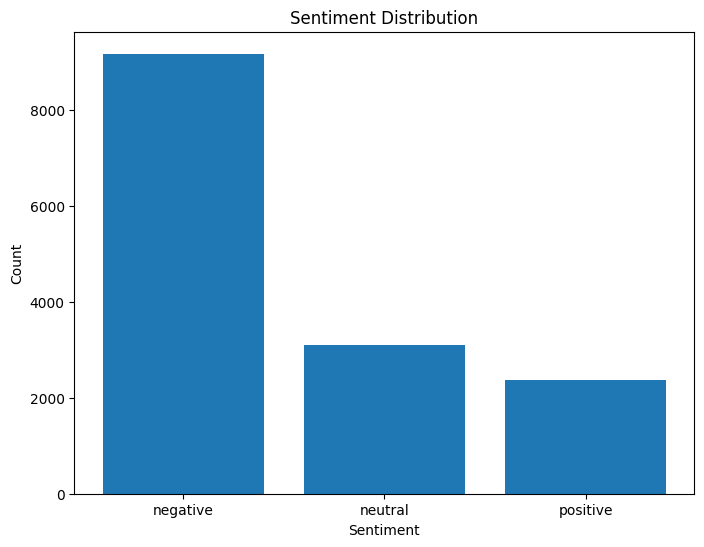

In [ ]:
# Visualize sentiment distribution
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# **Insights Generation**

In [ ]:
# Sentiment Distribution
sentiment_counts = data['airline_sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Analyze frequent words or phrases in positive and negative reviews.
positive_reviews = data[data['airline_sentiment'] == 'positive']['cleaned_text']
negative_reviews = data[data['airline_sentiment'] == 'negative']['cleaned_text']

# Count the most common words in positive and negative reviews
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

print("\nTop 10 Words in Positive Reviews:")
print(positive_word_counts.most_common(10))

print("\nTop 10 Words in Negative Reviews:")
print(negative_word_counts.most_common(10))


Sentiment Distribution:
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Top 10 Words in Positive Reviews:
[('thanks', 609), ('jetblue', 594), ('southwestair', 576), ('united', 528), ('thank', 452), ('flight', 373), ('americanair', 355), ('usairways', 276), ('great', 236), ('http', 217)]

Top 10 Words in Negative Reviews:
[('flight', 2925), ('united', 2894), ('usairways', 2372), ('americanair', 2108), ('southwestair', 1212), ('jetblue', 1051), ('get', 986), ('cancelled', 920), ('service', 740), ('hours', 646)]


***Here is simple overview about overall code we used:***
## Problem Definition *italicized text*
The primary goal of this project is to conduct sentiment analysis on customer feedback to gain valuable insights into competitor products. By analyzing customer sentiments, businesses can identify the strengths and weaknesses of competing products, which can guide them in improving their own offerings. Sentiment analysis is a crucial tool for understanding market dynamics and customer perceptions.

## Design Thinking

### Data Collection
**Data Collection** involves the process of obtaining a dataset that contains customer reviews and associated sentiments about competitor products. For this project, we will utilize the Twitter Airlines Sentiment dataset, which is accessible through this [link](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment). The dataset includes a collection of tweets expressing sentiment towards various airline companies.

### Data Preprocessing
**Data Preprocessing** is an essential step in preparing the text data for analysis. In this project, we will employ the Natural Language Toolkit (NLTK) library to perform text data cleaning. Specifically, we will remove common stopwords and tokenize the text, which involves breaking it down into individual words or tokens. This preprocessing step enhances the quality of the data and makes it more suitable for natural language processing tasks like sentiment analysis or text classification.

### Sentiment Analysis Techniques and Feature Extraction
In this section, we will delve into the techniques used for **Sentiment Analysis**. The primary approach employed is the Bag of Words (BoW) model in combination with a Multinomial Naive Bayes classifier. The BoW approach represents text data as a vector of word frequencies, while the Multinomial Naive Bayes classifier is a popular choice for text classification tasks.

### Visualization
**Visualization** plays a crucial role in understanding and presenting the results of sentiment analysis. To gain insights into the dataset's sentiment distribution, we utilize data visualization libraries such as Matplotlib. Specifically, we create a bar chart that visually represents the frequency of each sentiment label (positive, negative, neutral) in the dataset.

### Insights Generation
**Insights Generation** is the final step of the project, where we extract meaningful information from the sentiment analysis results. We aim to identify the most common words in positive and negative reviews, as well as to understand the overall sentiment distribution. This step is essential for guiding business decisions based on customer feedback.

## Word Frequency Visualization
This code snippet provides a detailed explanation of the word frequency visualization section:

The code utilizes libraries such as pandas, matplotlib, WordCloud, and seaborn to create insightful visualizations for word frequency analysis in positive and negative reviews.

1. **Word Clouds**: We generate word clouds for both positive and negative reviews. Word clouds visually represent words where the size of each word corresponds to its frequency. This helps identify the most prominent words in each sentiment category.

2. **Top N Common Words**: We identify and display the top N most common words in each category using bar plots. This approach provides a more detailed understanding of the most frequent terms in positive and negative feedback.

By conducting these analyses, businesses can gain deeper insights into customer sentiments and understand the key themes or words associated with positive and negative feedback.

